In [15]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

df_crp = pd.read_excel('crp_cleandata.xlsx')
df_crp.head(10)

,Retailer,Salerank,X2013USSales,X2013WorldSales,ProfitMargin,NumStores,Industry,Reward,ProgramName,RewardType,RewardStructure,RewardSize,ExpirationMonth,IndustryType
0,A&P,74,5.831,5.831,48.85,0.277,"Discount, Variety Stores",0,No rewards program,-,-,-,-,Discount
1,Albertsons,21,19.452,19.452,69.02,1.024,Grocery Stores,0,No rewards program,-,-,-,-,Grocery
2,Aldi,38,10.898,10.650,69.41,1.328,Grocery Stores,0,No rewards program,-,-,-,-,Grocery
3,Alimentation Couche Tard (Circle K),82,4.755,8.551,68.03,3.826,Grocery Stores,0,No rewards program,-,-,-,-,Grocery
4,Apple Stores,15,26.648,30.736,11.07,0.254,ElectronicEquipment,0,No rewards program,-,-,-,-,Specialty
5,Army Air Force Exchange,48,8.640,16.301,60.41,0.530,"Specialty Retail, Other",0,No rewards program,-,-,-,-,Specialty
6,AT&T Wireless,51,8.347,8.096,46.95,2.179,Telecom Services - Domestic,0,No rewards program,-,-,-,-,Specialty
7,Barnes & Noble,71,6.082,6.082,72.79,1.366,"Specialty Retail, Other",0,No rewards program,-,-,-,-,Specialty
8,Bed Bath & Beyond,36,11.319,10.967,10.07,1.453,Home Furnishing Stores,0,No rewards program,-,"Spend $200 earn 1,000 points = $10 reward cert...",-,-,Specialty
9,Big Lots,78,5.107,5.284,12.09,1.493,"Discount, Variety Stores",0,No rewards program,-,-,-,-,Discount


### Question 1:
* Delete row Reward if == 0
* Delete NumStores if == 0
* Delete ExpirationMonth if == 999
* What is the sum of the ExpirationMonth column?

In [7]:
df_clean_questao1 = df_crp[df_crp.Reward != 0]
df_clean_questao1 = df_clean_questao1[df_clean_questao1.NumStores != 0]
df_clean_questao1 = df_clean_questao1[df_clean_questao1.ExpirationMonth != 999]
df_clean_questao1.head()

,Retailer,Salerank,X2013USSales,X2013WorldSales,ProfitMargin,NumStores,Industry,Reward,ProgramName,RewardType,RewardStructure,RewardSize,ExpirationMonth,IndustryType
45,7-Eleven,35,11.625,11.504,50.31,7.974,"Discount, Variety Stores",1,7REWARDS,store credit,Buy 6 drinks = free drink,16.67,12,Discount
47,Advance Auto Parts,66,6.443,6.485,64.24,4.023,Auto Parts Stores,1,SpeedPerks,store credit,Spend $30/$100 = $5/$20 rewards for the next $...,16.6,2,Specialty
48,Ahold USA / Royal,17,26.118,44.028,40.87,0.767,Grocery Stores,1,Stop and Shop Rewards,gas discount,Spend $100 and earn 0.10 off per gallon for th...,15,1,Grocery
50,Ascena Retail Group (Ann Taylor),84,4.665,4.715,93.45,3.854,Apparel Stores,1,PerfectRewards,store credit,"Spend $400 earn 2,000 points = $20 PERFECT REW...",5,1,Specialty
51,AutoZone,56,7.584,15.190,96.64,4.802,Auto Parts Stores,1,AutoZone Rewards,store credit,Spend $20+ 5 times earn 5 credits = $20 mercha...,20,3,Specialty


In [13]:
print( (" Number of rows = {}, Number of columns = {}").format(*df_clean_questao1.shape) )

 Number of rows = 46, Number of columns = 14


In [14]:
print( ("Sum of ExpirationMonth = {}").format(df_clean_questao1.ExpirationMonth.sum()) )

Sum of ExpirationMonth = 336.0


---------------------------------------------------------------------------------------------------------------------------

### Question 2
#### Do a Linear regression models with ExpirationMonth column as the target variable, and Finde the highest R-squared FOR:

Predictor Variables
* Salerank, 
* X2013USSales, 
* X2013WorldSales, 
* NumStores,
* RewardSize, 
* ProfitMargin

In [56]:
def LinearReg(predict):
    X = df_clean_questao1.loc[:, 'ExpirationMonth'].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = df_clean_questao1.loc[:, predict].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
                              
    # sum of square of residuals
    ssr = np.sum((Y_pred - Y)**2)

    #  total sum of squares
    sst = np.sum((Y - np.mean(Y))**2)

    # R2 score
    r2_score = 1 - (ssr/sst)
    r2_score
                              
    return(X,Y_pred,Y,r2_score)

R2 Score =  0.0621542674612523


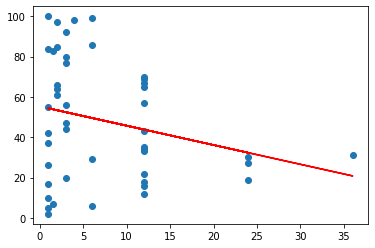

In [57]:
# a) Salerank

X,Y_pred,Y,r2_score = LinearReg('Salerank')
print("R2 Score = ",r2_score)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R2 Score =  0.008430686558979272


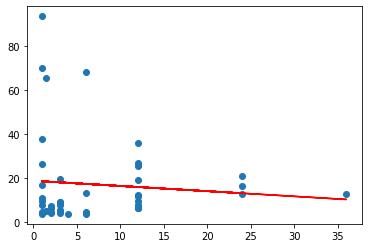

In [58]:
# b) X2013USSales

X,Y_pred,Y,r2_score = LinearReg('X2013USSales')
print("R2 Score = ",r2_score)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R2 Score =  0.005105133339090129


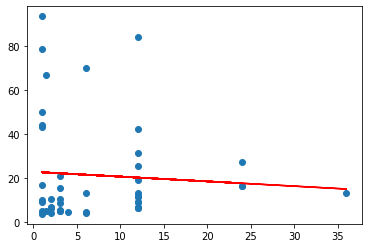

In [59]:
# c) X2013WorldSales

X,Y_pred,Y,r2_score = LinearReg('X2013WorldSales')
print("R2 Score = ",r2_score)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R2 Score =  0.25371471874343043


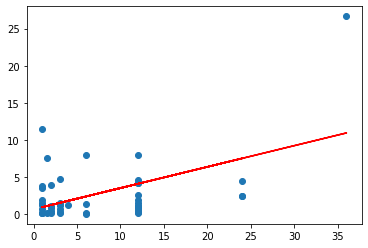

In [60]:
# d) NumStores

X,Y_pred,Y,r2_score = LinearReg('NumStores')
print("R2 Score = ",r2_score)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R2 Score =  0.02040225610581281


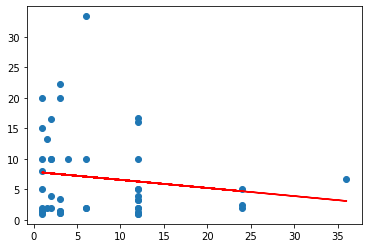

In [61]:
# e) RewardSize

X,Y_pred,Y,r2_score = LinearReg('RewardSize')
print("R2 Score = ",r2_score)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R2 Score =  0.02040225610581281


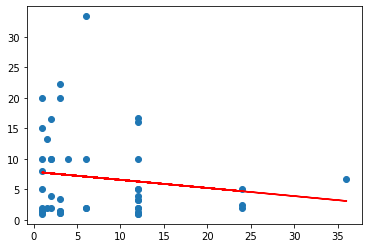

In [62]:
# f) ProfitMargin

X,Y_pred,Y,r2_score = LinearReg('RewardSize')
print("R2 Score = ",r2_score)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

--------------------------------------------------------------------------------------------------------------

### Question 3, 4
#### estimated intercept,estimated slope:

In [33]:
def LinearRegCoef(predict):
    X = df_clean_questao1.loc[:, 'ExpirationMonth'].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = df_clean_questao1.loc[:, predict].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions

    print('Slope:' ,linear_regressor.coef_)
    print('Intercept:', linear_regressor.intercept_)

In [34]:
LinearRegCoef('NumStores')

Slope: [[0.28512195]]
Intercept: [0.69973966]


### Question 5,6,7,8,9
#### Log transformation:

* Model 1: neither variable is transformed; this gives you the same model as in the previous question.
* Model 2: only the target variable is transformed
* Model 3: only the explanatory variable is transformed
* Model 4: both variables are transformed.

Report the R-squared values of all four models.

In [93]:
def Transform_LinearReg(target,predict):
    X = df_clean_questao1.loc[:, target].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = df_clean_questao1.loc[:, predict].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
                              
    # sum of square of residuals
    ssr = np.sum((Y_pred - Y)**2)

    #  total sum of squares
    sst = np.sum((Y - np.mean(Y))**2)

    # R2 score
    r2_score = 1 - (ssr/sst)
    r2_score
                              
    return(X,Y_pred,Y,r2_score)

R2 Score =  0.25371471874343043


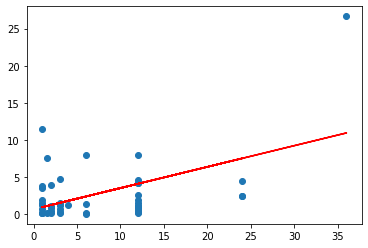

In [103]:
## 5) Model 1

X,Y_pred,Y,r2_score = Transform_LinearReg('ExpirationMonth','NumStores')
print("R2 Score = ",r2_score)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R2 Score =  0.07041983612024383


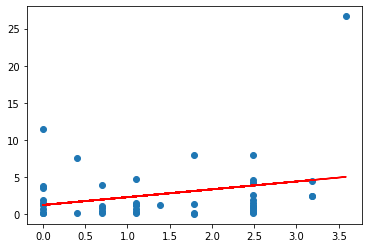

In [104]:
## 6) Model 2
def transform(name,dtaframe):
    list_transformation = []
    dtaframe
    for n in dtaframe:
        list_transformation.append(np.log(n))

    df_temp = pd.DataFrame(list_transformation)
    df_temp.columns = [name]
    return(df_temp)

target = transform('ExpirationMonth',df_clean_questao1['ExpirationMonth'])

X = target.values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_clean_questao1.loc[:, 'NumStores'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

# sum of square of residuals
ssr = np.sum((Y_pred - Y)**2)

#  total sum of squares
sst = np.sum((Y - np.mean(Y))**2)

# R2 score
r2_score = 1 - (ssr/sst)
r2_score


print("R2 Score = ",r2_score)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


R2 Score =  0.144696826130986


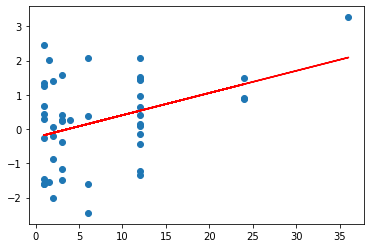

In [105]:
## 7) Model3 

target = transform('NumStores',df_clean_questao1['NumStores'])

X = df_clean_questao1.loc[:, 'ExpirationMonth'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = target.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

# sum of square of residuals
ssr = np.sum((Y_pred - Y)**2)

#  total sum of squares
sst = np.sum((Y - np.mean(Y))**2)

# R2 score
r2_score = 1 - (ssr/sst)
r2_score


print("R2 Score = ",r2_score)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R2 Score =  0.06526684762496393


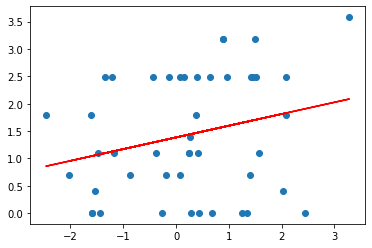

In [106]:
## 7) Model4 

target = transform('NumStores',df_clean_questao1['NumStores'])
predict = transform('ExpirationMonth',df_clean_questao1['ExpirationMonth'])


X = target.values.reshape(-1, 1)  # values converts it into a numpy array
Y = predict.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

# sum of square of residuals
ssr = np.sum((Y_pred - Y)**2)

#  total sum of squares
sst = np.sum((Y - np.mean(Y))**2)

# R2 score
r2_score = 1 - (ssr/sst)
r2_score


print("R2 Score = ",r2_score)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

### Question 10
#### Do a MultiLinear regression models with ExpirationMonth column as the target variable, and Finde the highest R-squared FOR:

Predictor Variables
* Salerank, 
* X2013USSales, 
* RewardSize, 
* ProfitMargin

In [127]:
def MultiLR(target):
    X = df_clean_questao1.loc[:, ['ExpirationMonth',target]].values
    Y = df_clean_questao1.loc[:, 'NumStores'].values
    
    regressor = LinearRegression()
    regressor.fit(X,Y)

    Y_pred= regressor.predict(X)
    
    ####
    # sum of square of residuals
    ssr = np.sum((Y_pred - Y)**2)

    #  total sum of squares
    sst = np.sum((Y - np.mean(Y))**2)

    # R2 score
    r2_score = 1 - (ssr/sst)
    r2_score
    
    return(X,Y_pred,r2_score,regressor)

In [129]:
## a)Salerank

X,Y_pred,r2_score,regressor = MultiLR('Salerank')
print(" Salerank R2 Score = ",r2_score)


 Salerank R2 Score =  0.2687855774055481


In [130]:
## b)X2013USSales

X,Y_pred,r2_score,regressor = MultiLR('X2013USSales')
print(" X2013USSales R2 Score = ",r2_score)


 X2013USSales R2 Score =  0.29717822630695445


In [132]:
## b)RewardSize

X,Y_pred,r2_score,regressor = MultiLR('RewardSize')
print(" RewardSize R2 Score = ",r2_score)

 RewardSize R2 Score =  0.27232809483227016


In [133]:
## b)ProfitMargin

X,Y_pred,r2_score,regressor = MultiLR('ProfitMargin')
print(" ProfitMargin R2 Score = ",r2_score)

 ProfitMargin R2 Score =  0.25376806813398456
